# Instruction for assignment #1 (R version)
---

## Submission info.
***
- Due : 
- E-mail to:

## Instruction
***
- You can use any language you like, such as R or Python.
- I highly recommand you to use **python3** (not python2), if you'd like to use python.
- We will use 3 csv files: 'transaction_par1.csv', 'offers.csv', 'trainHistory.csv' <br>
- The instruction was made by R, so the **appearance of results may different.**
- However, ***the value of the result must be the same with this instruction.***

## Data information (In Korean)
***
#### trainHistory.csv
- id: 고객ID
- chain: 매점 체인
- offer: 쿠폰 ID
- market: 위치정보
- reprattrips: 재구매횟수
- repeater: 재구매여부
- offerdate: 쿠폰발행일자

#### offer.csv
- offer: 쿠폰 ID
- category: 제품종류
- quantity: 최소 구매 수
- company: 제조사
- offervalue: 할인가
- brand: 브랜드

#### transaction.csv
- id: 고객 ID
- chain: 매점 체인
- dept: 품목
- category: 제품 종류
- company: 제조사
- brand: 브랜드
- date: 구매일
- productsize: 구매 제품 양
- productmeasure: 제품단위
- productquantity: 구매 수
- productamount: 구매액

이 데이터는 다수의 고객에게 할인쿠폰을 제공하고, 그것에 고객들이 어떻게 반응했는지를 포함하고 있다. history 파일은 고객의 반응, offer 파일은 할인 쿠폰의 종류, transaction 파일은 구매 정보를 포함하고 있다.

transaction 파일은 history 파일과 (id, chain) 컬럼을 이용하여 join이 가능하다. history 파일은 offer 파일과 (offer) 컬럼을 이용하여 join이 가능하다. transaction 파일은 offer 파일과 (category, brand, company) 컬럼을 이용하여 join이 가능하다. productquantity와 purchaseamount에서의 음수값은 반품을 의미한다.

In [1]:
#library(data.table)
#library(ggplot2)
#library(dplyr)
#library(lubridate)

In [2]:
#setwd("~/OneDrive/DGIST/")

load 3 csv files

In [3]:
#transaction <- fread("transaction_part1.csv", colClasses = c(rep("factor",10), "integer"))
#offers <- fread("offers.csv", colClasses = c(rep("factor", 4), "integer", "factor"))
#train <- fread("trainHistory.csv", colClasses = c(rep("factor",4), "integer", "factor","date"))

#offers <- offers[, `:=`(quantity = as.numeric(quantity))]
#transaction <- transaction[, `:=`(date = as.Date(date), productsize = as.numeric(productsize), purchasequantity = as.integer(purchasequantity))]

Read 4681100 rows and 11 (of 11) columns from 0.255 GB file in 00:00:04


## Problem 1: EDA with offers data
***

#### (a) Find the number of offers by company. Show the table of the result, and illustrate it with bar plot.
**NOTE:** you should ***make the data in descending order*** as shown below.

company,N
104460040,7
107120272,5
103700030,5
105100050,2
107717272,2
1087744888,2
1076211171,2
105450050,2
108500080,1
107127979,1


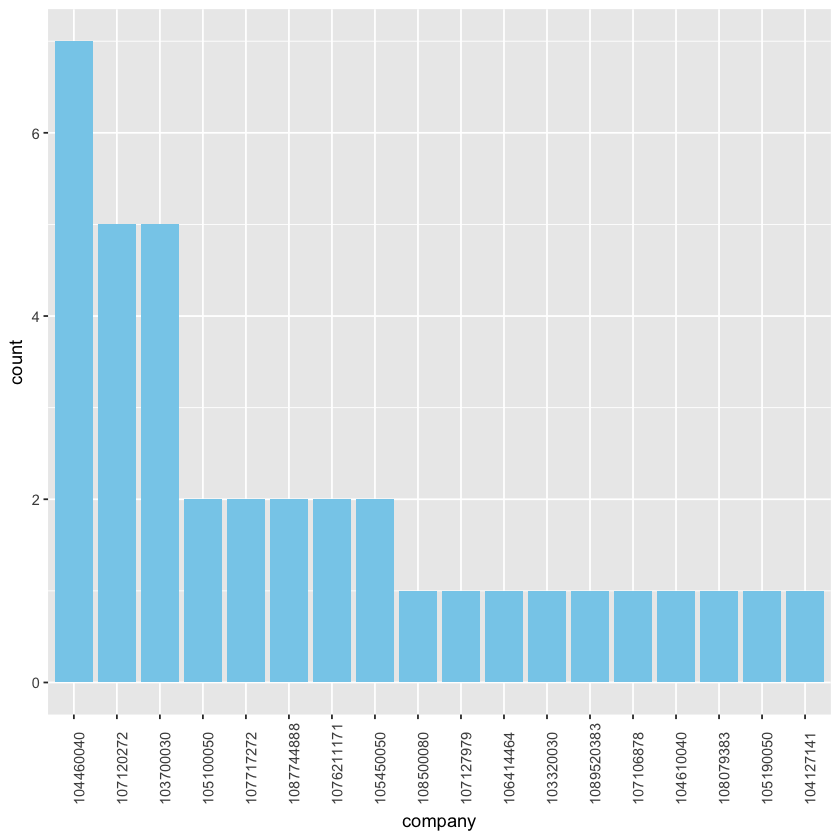

#### (b) Find the number of offers by category. Show the table of the result, and illustrate it with bar plot.
**NOTE:** you should ***make the data in descending order*** as shown below.

category,N
5558,5
7205,5
9909,2
4401,2
1703,2
1726,2
5619,2
2202,2
6202,2
799,2


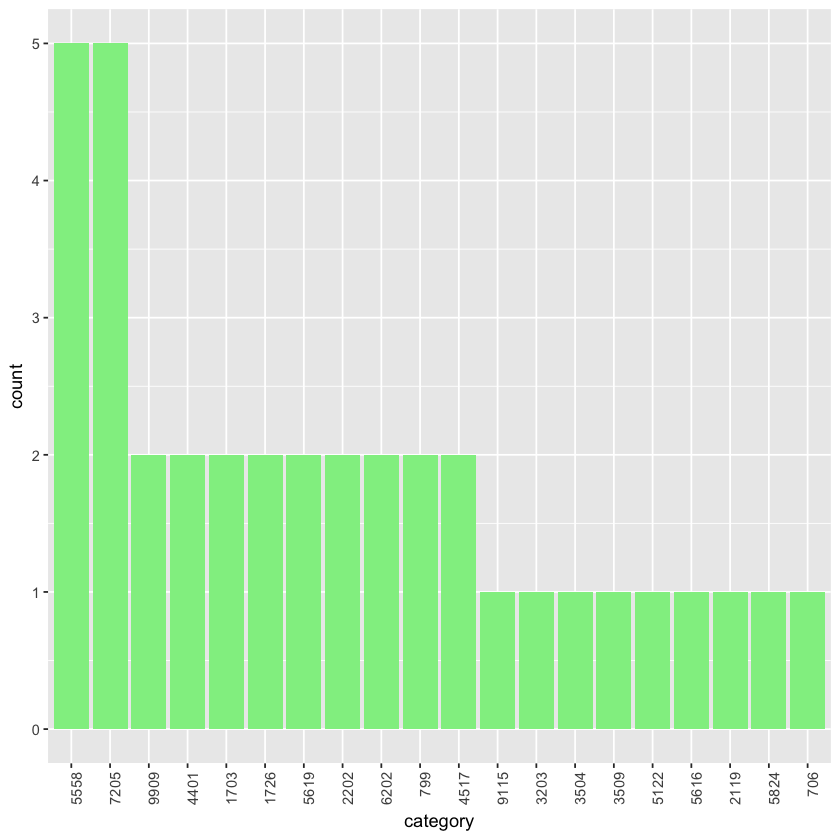

#### (c) Find the number of offers by brand. Show the table of the result, and illustrate it with bar plot.
**NOTE:** you should ***make the data in descending order*** as shown below.

brand,N
5072,5
7668,5
4294,5
13791,2
102504,2
3718,2
64486,2
17286,2
1322,2
93904,1


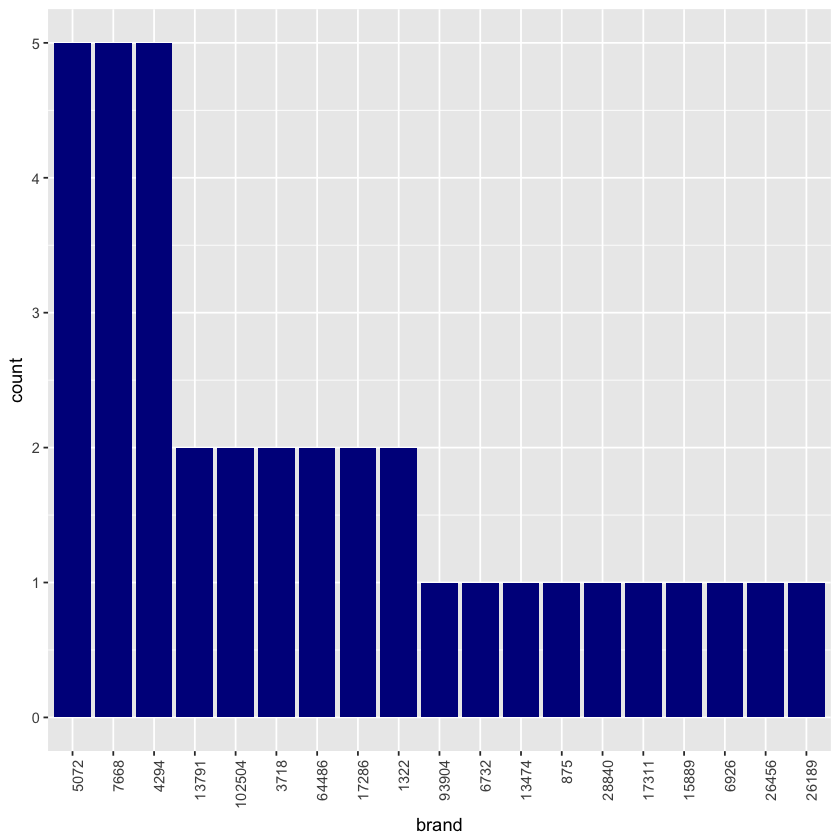

#### (d) Find the (Min., 1Q, Median, Mean, 3Q, Max.) value of (offervalue, quantity).

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.750   1.500   1.500   1.649   1.500   5.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.027   1.000   2.000 

#### (e) Find all records from offer.csv which have 'quantity > 1' (Show all columns in the records).

offer,category,quantity,company,offervalue,brand
1221658,7205,2,103700030,3,4294


## Problem 2: EDA with TrainHistory data

#### (a) Find the minimum and maximum offer date in train history.

[1] "2013-03-01"

[1] "2013-04-30"

#### (b) Find the number of customer by each offer. Show the table of the result, and illustrate it with bar plot.
**NOTE:** you should ***make the data in descending order*** as shown below.

offer,N
1197502,45652
1208329,18767
1203052,15337
1208251,15028
1199256,7971
1204576,7293
1199258,7037
1194044,6810
1208501,6643
1200581,5032


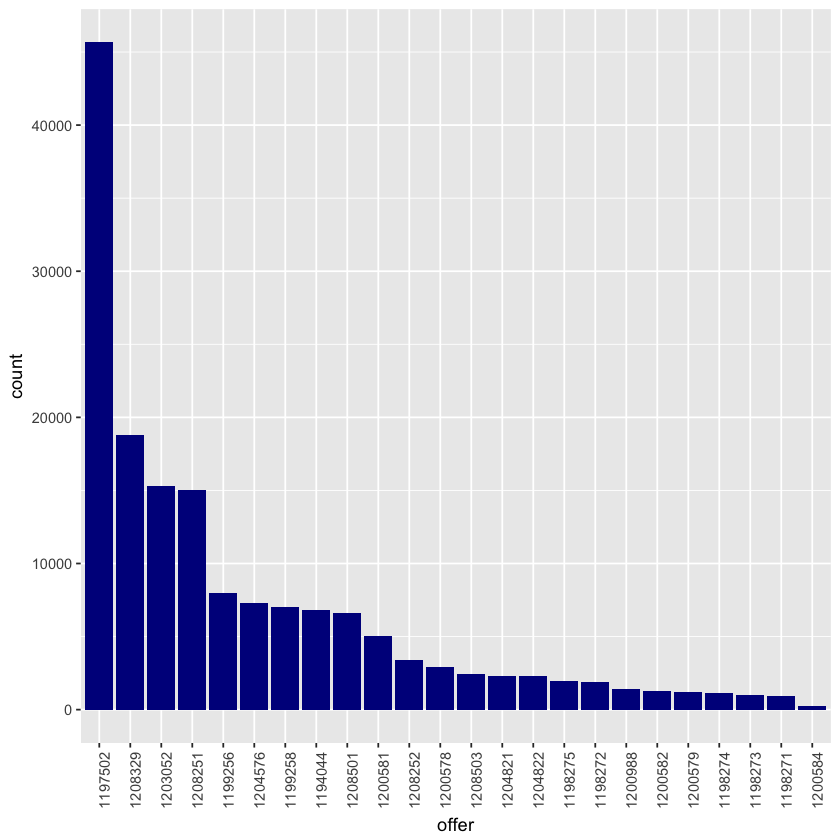

#### (c) Find the number of customer by repeater. Show the table of the result.

repeater,N
t,43438
f,116619


#### (d) Find the ratio of repeater and add the column in (c) named 'ratio'.  Show the table of the result.

repeater,N,ratio
t,43438,0.2713908
f,116619,0.7286092


***
***NOTE: The join operation is required from the problems below.***
***
#### (e) Merge two data (trainHistory.csv and offer.csv) by 'offer'. Find the repeater's distribution with the category. Show the table of the result, and illustrate it with bar plot.
**NOTE:** You should ***make the data in descending order*** as shown below. Also, the type of repeater must ***distinguishable*** by different color.

category,N
3203,45652
9909,22147
2119,18767
2202,18421
4401,15008
6202,9056
5616,7293
5558,6974
1726,6323
5619,4616


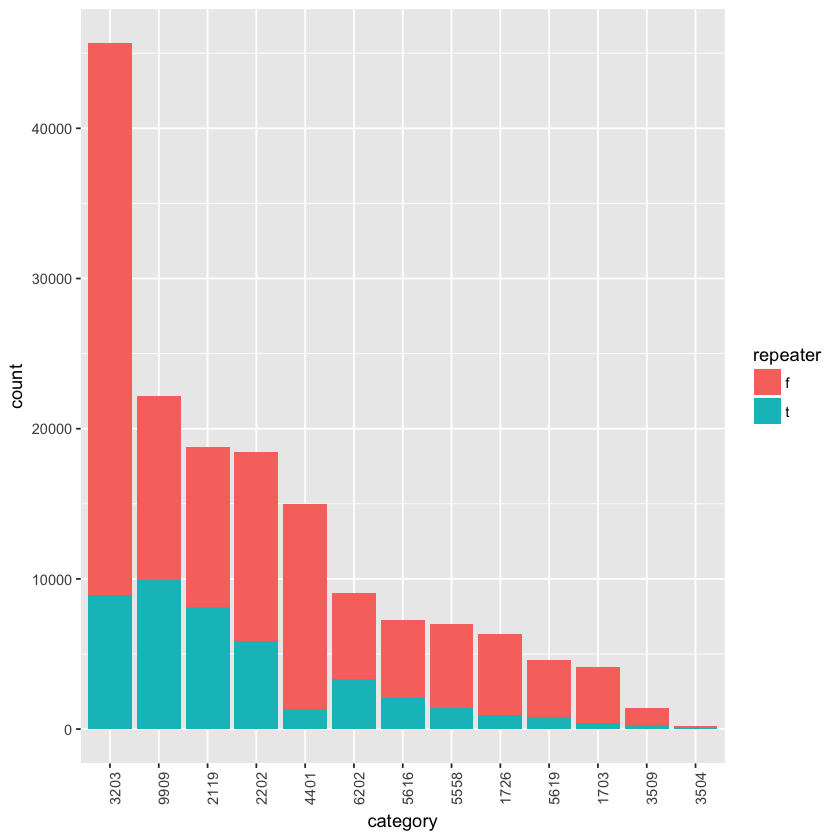

#### (f)  Print percentage of repeaters within a category.
**NOTE:** You should ***make the data in descending order*** as shown below.<br>
***Tip:*** You should make different tables with RepeatCustomer and TotalCustomer, and merge them.


category,RepeatCustomer,TotalCustomer,ratio
9909,9950,22147,0.44927078
2119,8152,18767,0.43437950
6202,3333,9056,0.36804329
2202,5857,18421,0.31795234
5616,2075,7293,0.28451940
3504,51,222,0.22972973
5558,1385,6974,0.19859478
3203,8940,45652,0.19582932
3509,264,1418,0.18617772
5619,792,4616,0.17157712


#### (g) Find the repeater's distribution with the brand. Show the table of the result, and illustrate it with bar plot.
**NOTE:** You should ***make the data in descending order*** as shown below. Also, the type of repeater must ***distinguishable*** by different color.

brand,N
13474,45652
6926,18767
3718,18421
28840,15337
13791,15008
7668,10705
64486,9056
15889,7293
5072,6974
6732,6810


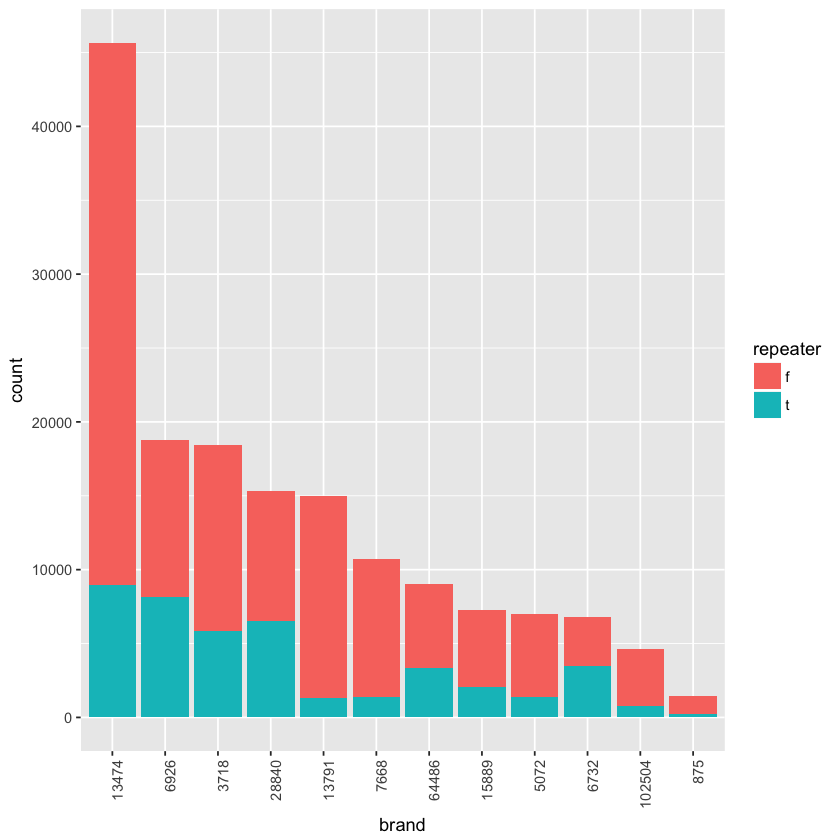

#### (h)  Print percentage of repeaters within a brand.
**NOTE:** You should ***make the data in descending order by ratio*** as shown below.<br>
Tip: You should make different tables with RepeatCustomer and TotalCustomer, and merge them.


brand,RepeatCustomer,TotalCustomer,ratio
6732,3453,6810,0.50704846
6926,8152,18767,0.43437950
28840,6497,15337,0.42361609
64486,3333,9056,0.36804329
3718,5857,18421,0.31795234
15889,2075,7293,0.28451940
5072,1385,6974,0.19859478
13474,8940,45652,0.19582932
875,264,1418,0.18617772
102504,792,4616,0.17157712


#### (i) Find the (Min., 1Q, Median, Mean, 3Q, Max.) value of repeattrips count.
**NOTE:** The data should only with repeater == "t"<br>

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   1.000    1.000    1.000    2.418    2.000 2124.000 

#### (j) Find all records from merged data from (e), which have 'repeattrips > 100' (Show all columns in the records).

offer,id,chain,market,repeattrips,repeater,offerdate,category,quantity,company,offervalue,brand
1197502,3450535153,306,6,1418,t,2013-04-18,3203,1,106414464,0.75,13474
1197502,3465135195,306,6,2124,t,2013-03-25,3203,1,106414464,0.75,13474
1203052,4176323168,166,14,104,t,2013-04-01,9909,1,1089520383,1.00,28840
1203052,4427711419,152,10,549,t,2013-04-02,9909,1,1089520383,1.00,28840


#### (k) Find the repeat trip count distribution with the offer. Show the table of the result, and illustrate it with vertical box plot.
**NOTE:** You should ***rescale the y-axis limitation to [0,15]*** as shown below. The warning will be occured. (ignore the warning!)

Warning message:
“Removed 370 rows containing non-finite values (stat_boxplot).”

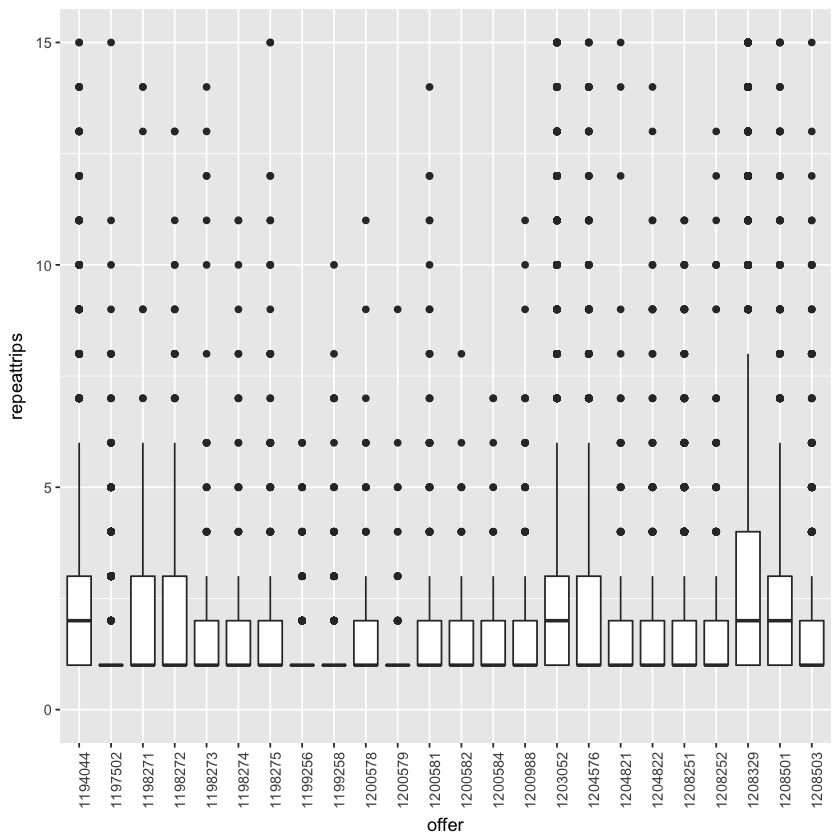

#### (l) Find the repeat trip count distribution with the category. Show the table of the result, and illustrate it with vertical box plot.
**NOTE:** You should ***rescale the y-axis limitation to [0,15]*** as shown below. The warning will be occured. (ignore the warning!)

Warning message:
“Removed 370 rows containing non-finite values (stat_boxplot).”

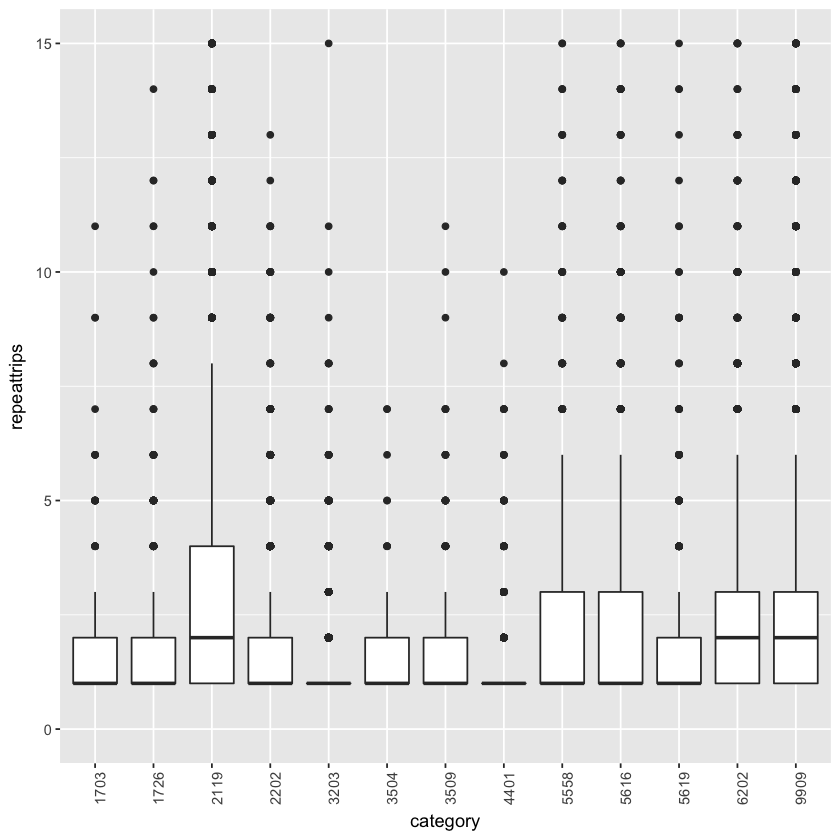

#### (m) Find the repeat trip count distribution with the brand. Show the table of the result, and illustrate it with vertical box plot.
**NOTE:** You should ***rescale the y-axis limitation to [0,15]*** as shown below. The warning will be occured. (ignore the warning!)

Warning message:
“Removed 370 rows containing non-finite values (stat_boxplot).”

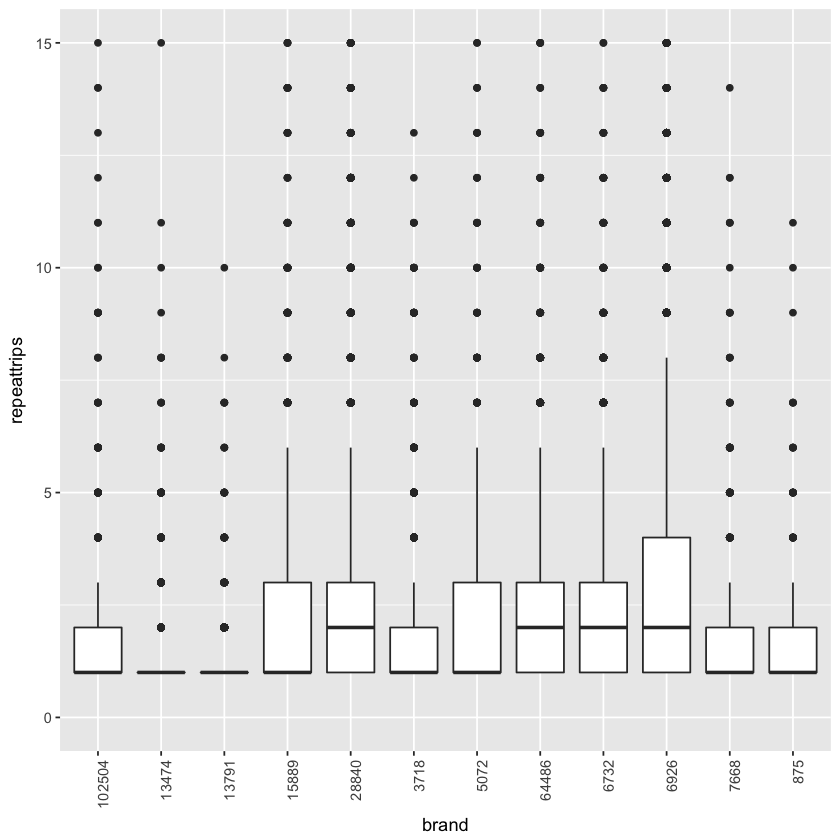

## Problem 3: EDA with Transaction data

#### (a) Make new table by subsetting merged data from 'Problem 2-e', with attribute ('offer', 'id', 'market', 'repeattrips', 'repeater', 'offerdate', 'quantity', 'offervalue').

offer,id,market,repeattrips,repeater,offerdate,quantity,offervalue
1194044,242209515,21,0,f,2013-03-01,1,1
1194044,242227530,35,2,t,2013-03-12,1,1
1194044,242248454,21,0,f,2013-03-06,1,1
1194044,242328840,34,0,f,2013-04-10,1,1
1194044,243115332,21,0,f,2013-03-02,1,1
1194044,244992348,21,1,t,2013-03-04,1,1
1194044,245124554,21,0,f,2013-03-17,1,1
1194044,245142212,21,4,t,2013-03-01,1,1
1194044,245179183,34,3,t,2013-04-02,1,1
1194044,245575569,21,1,t,2013-03-23,1,1


#### (b) Merge the transaction data and subset data from (a) , by id, with ***inner-join***

id,chain,dept,category,company,brand,date,productsize,productmeasure,purchasequantity,purchaseamount,offer,market,repeattrips,repeater,offerdate,quantity,offervalue
100012115,3,9,907,107989373,29344,2012-03-12,325,OZ,24,1.99,1208251,2,1,t,2013-04-23,1,2
100012115,3,9,907,102113020,15704,2012-03-26,325,OZ,24,1.99,1208251,2,1,t,2013-04-23,1,2
100012115,3,4,418,102734323,11076,2012-04-07,1045,OZ,118,5.98,1208251,2,1,t,2013-04-23,1,2
100012115,3,19,1908,105150050,16728,2012-04-29,325,OZ,24,3.99,1208251,2,1,t,2013-04-23,1,2
100012115,3,4,416,104000040,16765,2012-05-02,126,OZ,196,2.38,1208251,2,1,t,2013-04-23,1,2
100012115,3,9,907,107989373,29344,2012-05-02,325,OZ,24,1.99,1208251,2,1,t,2013-04-23,1,2
100012115,3,19,1908,105150050,16728,2012-05-03,325,OZ,118,7.98,1208251,2,1,t,2013-04-23,1,2
100012115,3,19,1908,105150050,16728,2012-05-17,325,OZ,24,4.89,1208251,2,1,t,2013-04-23,1,2
100012115,3,8,818,107234373,11663,2012-05-23,683,OZ,118,-3.83,1208251,2,1,t,2013-04-23,1,2
100012115,3,10,1013,102400020,4704,2012-05-23,325,OZ,211,10.97,1208251,2,1,t,2013-04-23,1,2


#### (c) Find the ratio of new customer (repeater == 'f')

[1] 0.7438373

#### (d) Find the number of customer by (id, repeater). Show the table of the result.

id,repeater,N
100012115,t,37
100017875,f,80
100051423,f,186
100258679,f,134
100337236,f,142
100398864,f,464
100472970,f,287
100541937,f,311
100560096,f,16
100656827,f,98


#### (e) Find the (Min., 1Q, Median, Mean, 3Q, Max.) value of number of repeater, and non-repeater from the data in (d)

for repeater,

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    5.0   170.0   273.0   319.5   402.5 14350.0 

for non-repeater,

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    3.0   136.0   230.0   273.2   364.0  4804.0 

#### (f) Find the number of transactions by (pruchasequantity, repeater).
**NOTE:** You should ***make the data in ascending order with purchasequantity*** as shown below.<br>

purchasequantity,repeater,N
1,f,3233
1,t,537
3,f,1
3,t,1
4,t,2
4,f,1
6,f,1
6,t,2
7,f,1
7,t,1


## Problem 4. Advanced plotting

***
**[Advanced] Now, you will draw couple of advanced plots.**
(with very limited instructions.)
***

#### (a) You can see that there are 6 chains in our transaction data. Draw a pareto-chart of number of transactions, repect to chains.
**NOTE**: You should illustrate bar and line in same plot, and add secondary axis with scale [0,1] at right-side of plot.<br>
If you can do, add the red-horizontal line at 80% of y-axis<br>
<br>
***Tip***<br>
You might have to add accumulate of number of transactions, and add normalize value of accumulation.

chain,N,accum,accum_norm
6,860756,860756,0.0000000
2,501369,1362125,0.3557098
4,405916,1768041,0.6436978
8,379713,2147754,0.9130955
3,106916,2254670,0.9889499
9,15575,2270245,1.0000000


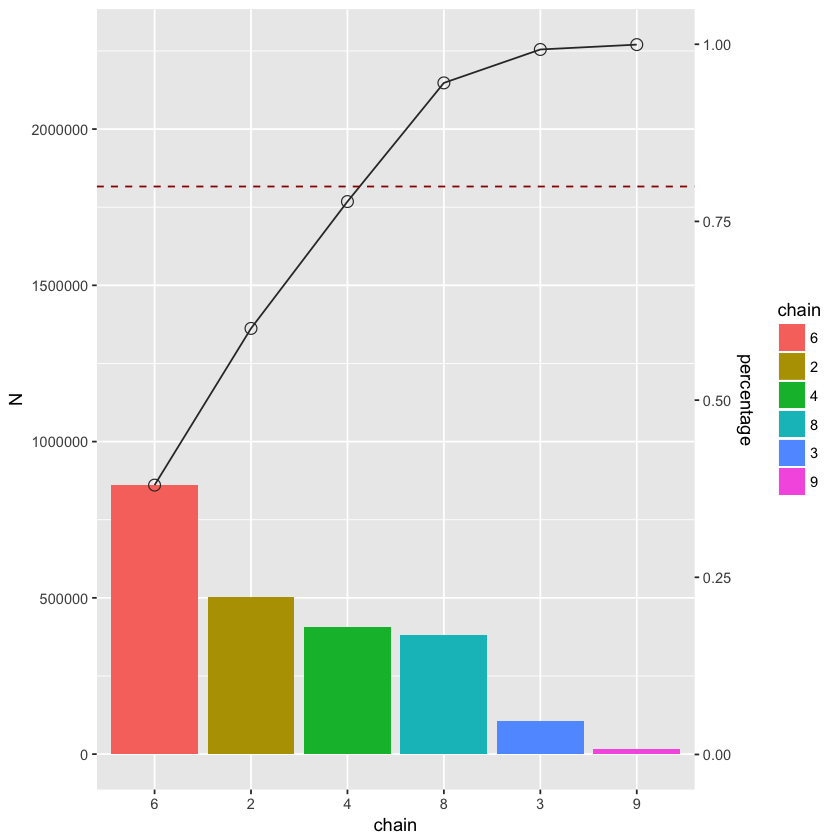

#### (b) Draw a line-chart of purchase amount per single transaction by days, group with repeater. Repeater 't' and 'f' must ***distinguishable*** by different color point.
**NOTE**: You should illustrate two lines in same plot, and make them distinguishable with point color.<br>
<br>
***Tip***<br>
You might have to add another column to represent amount per single transaction by each group.

date,repeater,purchaseamount,norm_amount
2012-03-02,f,17855.69,0.010573674
2012-03-02,t,7025.36,0.012080364
2012-03-03,f,20624.78,0.012213457
2012-03-03,t,8888.99,0.015284944
2012-03-04,f,26792.76,0.015865974
2012-03-04,t,10227.80,0.017587077
2012-03-05,f,15732.49,0.009316371
2012-03-05,t,7470.37,0.012845575
2012-03-06,f,13392.23,0.007930530
2012-03-06,t,7257.20,0.012479022


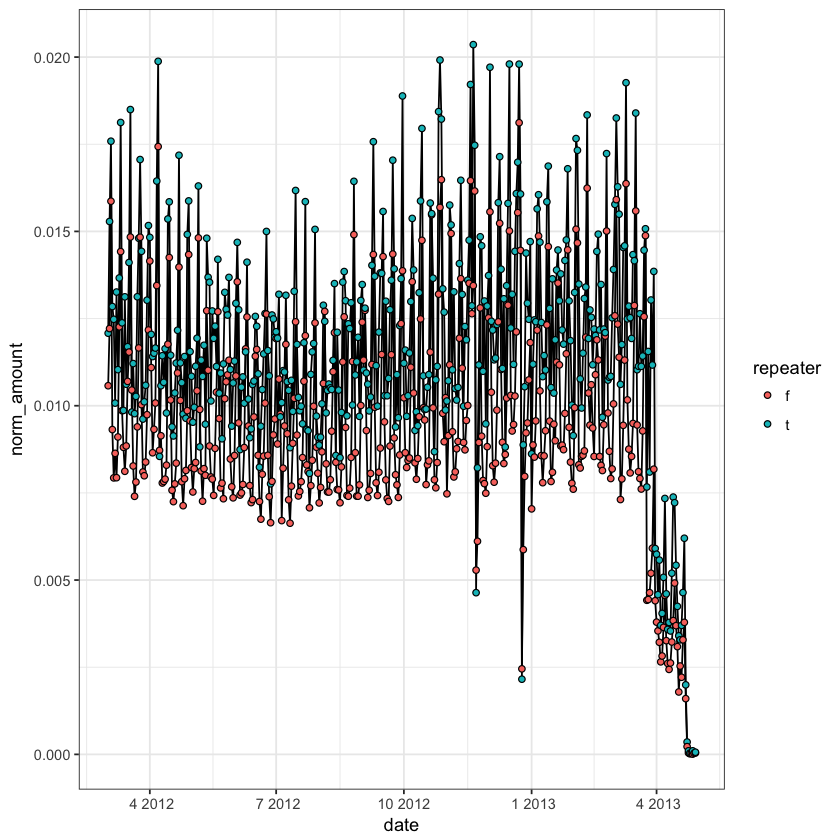